In [1]:
import numpy as np
import pandas as pd

from hmmlearn import hmm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15, 10)})

np.random.seed(42069)

import warnings; warnings.simplefilter('ignore')

DATA_PATH = "D:/Tick Data/GLD.csv"

In [2]:
df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)
df.sort_index()
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-02-12,1823.2,169671,1825.4,1825.1,1819.1
2021-02-11,1826.8,143597,1844.3,1848.6,1821.7
2021-02-10,1842.7,173508,1838.3,1856.6,1834.0
2021-02-09,1837.5,151353,1832.4,1849.5,1830.3
2021-02-08,1834.2,171978,1818.1,1840.6,1807.3
...,...,...,...,...,...
2011-02-23,1414.0,134786,1406.0,1417.3,1396.0
2011-02-22,1401.1,206459,1403.0,1411.5,1390.1
2011-02-18,1388.6,103320,1383.8,1392.6,1382.0


In [3]:
df.drop([' Volume', ' Open', ' High', ' Low'],axis=1, inplace=True)

In [4]:
df.columns = ['Close']

In [5]:
nullvaluecheck = pd.DataFrame(df.isna().sum().sort_values(ascending=False)*100/df.shape[0],columns=['missing %']).head(60)
nullvaluecheck.style.background_gradient(cmap='PuBu')

,missing %
Close,0.000000


In [6]:
returns = np.log(df['Close']).diff()
returns.dropna(inplace=True)

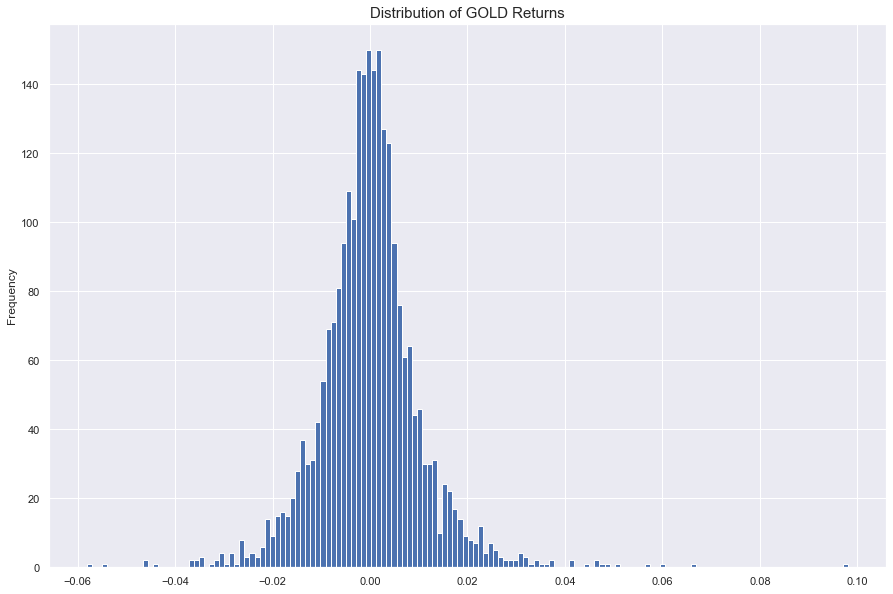

In [7]:
returns.plot(kind='hist',bins=150)
plt.title(label='Distribution of GOLD Returns', size=15)
plt.show()

In [8]:
split = int(0.2*len(returns))
X = returns[:-split]
X_test = returns[-split:]

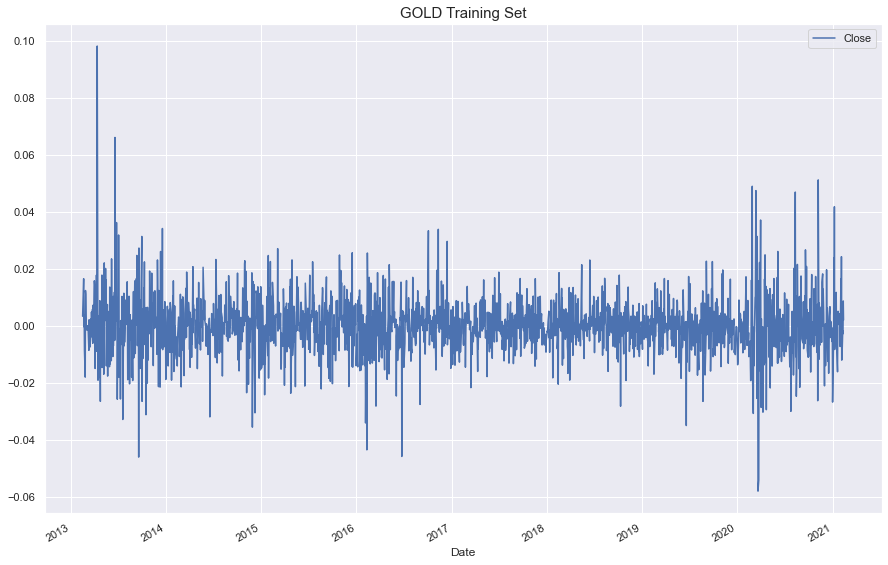

In [9]:
pd.DataFrame(X).plot()
plt.title(label='GOLD Training Set', size=15)
plt.show()

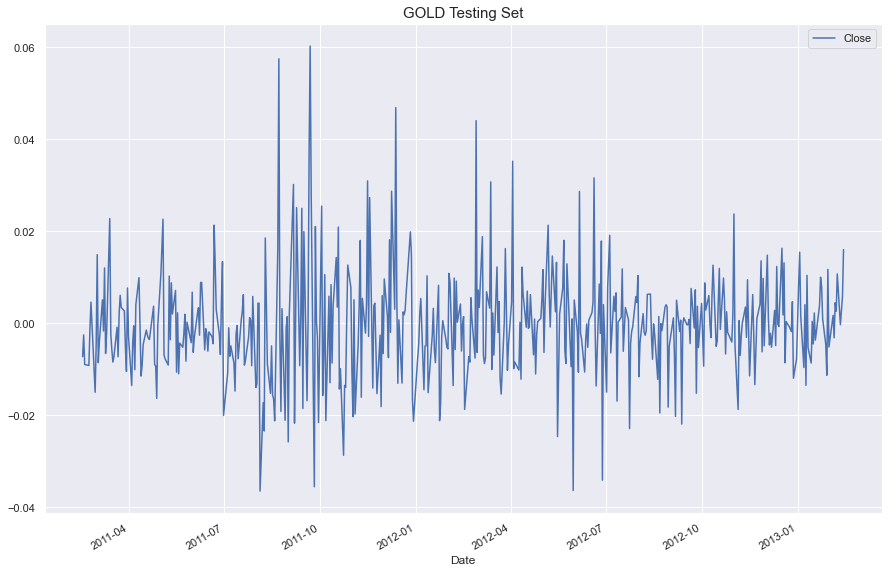

In [10]:
pd.DataFrame(X_test).plot()
plt.title(label='GOLD Testing Set', size=15)
plt.show()

In [11]:
X = X.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

In [12]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", verbose=True)

In [13]:
%%time
model.fit(X)

Wall time: 70.1 ms


         1        4869.4863             +nan
         2        6383.2502       +1513.7639
         3        6394.9044         +11.6542
         4        6425.0428         +30.1385
         5        6461.7789         +36.7361
         6        6492.2587         +30.4798
         7        6513.9764         +21.7177
         8        6528.6817         +14.7053
         9        6538.5724          +9.8908
        10        6545.3162          +6.7438


GaussianHMM(n_components=2, verbose=True)

In [14]:
model.transmat_ = np.array([
                            [0.8, 0.2],
                            [0.2, 0.8]
                           ])

Z = model.predict(X_test)
Z_train = model.predict(X)

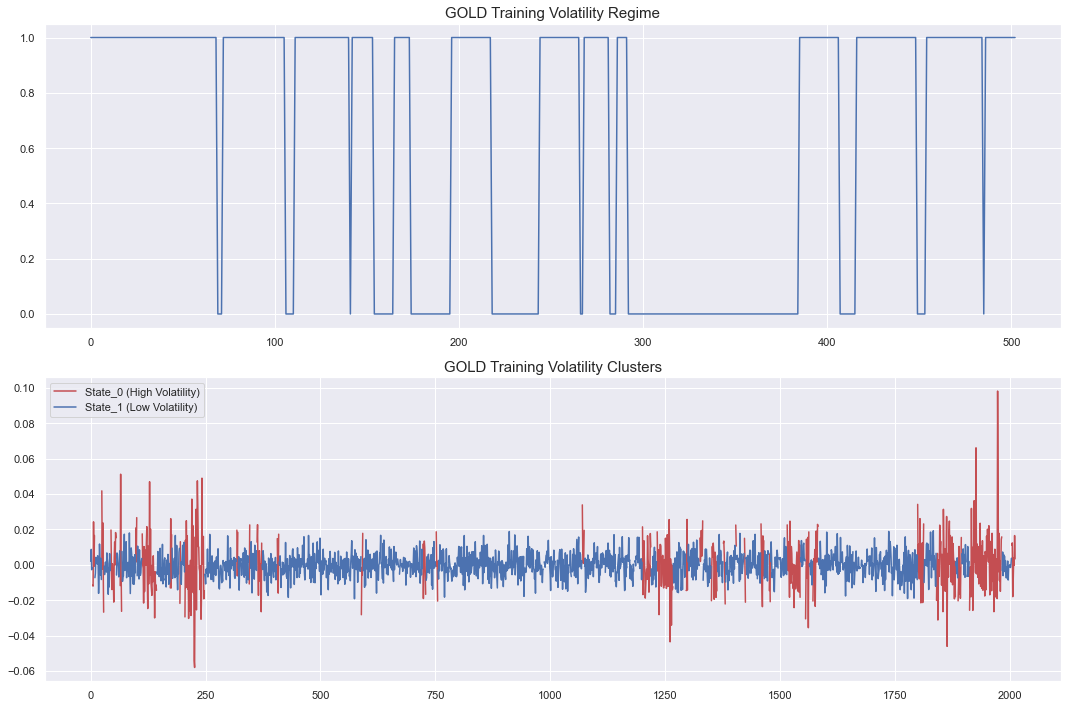

In [15]:
# Compute State Changes
returns_train0 = np.empty(len(Z_train))
returns_train1 = np.empty(len(Z_train))
returns_train0[:] = np.nan
returns_train1[:] = np.nan

# Create series for each state change
returns_train0[Z_train == 0] = returns[:-split][Z_train == 0]
returns_train1[Z_train == 1] = returns[:-split][Z_train == 1]

# Plot the Volatility Regime and the states
fig, ax = plt.subplots(figsize=(15,10))

plt.subplot(211)
plt.plot(Z)
plt.title(label='GOLD Training Volatility Regime', size=15)

plt.subplot(212)
plt.plot(returns_train0, label='State_0 (High Volatility)', color='r')
plt.plot(returns_train1, label='State_1 (Low Volatility)', color='b', )
plt.title(label='GOLD Training Volatility Clusters', size=15)
plt.legend()
plt.tight_layout()

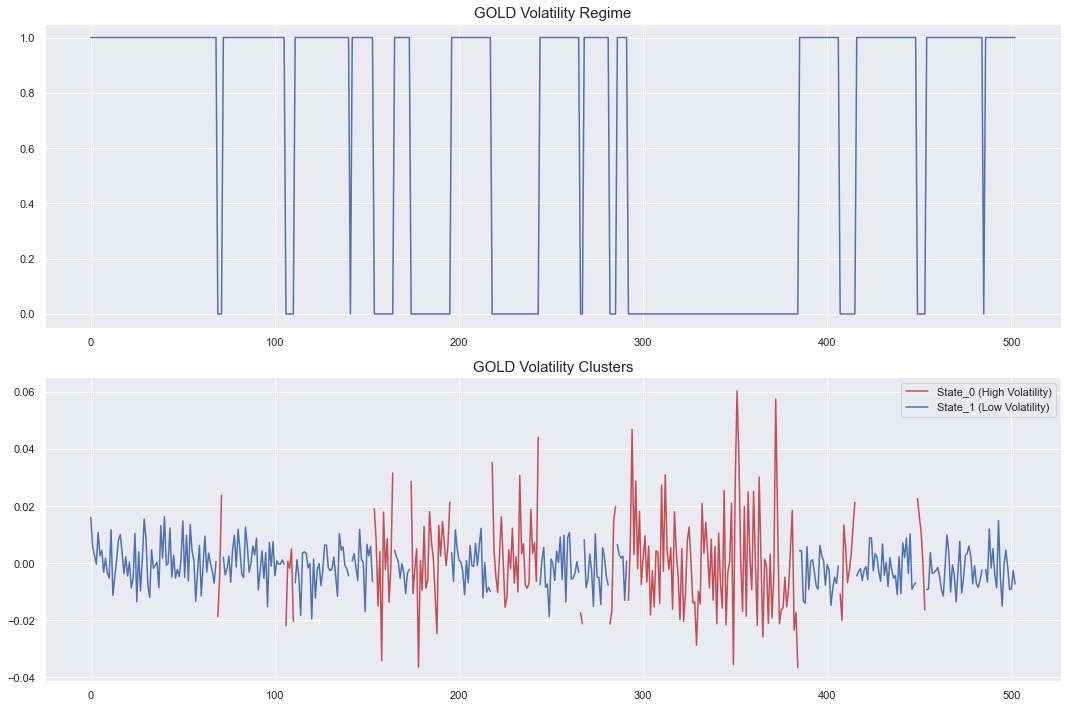

In [16]:
# Compute State Changes
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# Create series for each state change
returns0[Z == 0] = returns[-split:][Z == 0]
returns1[Z == 1] = returns[-split:][Z == 1]

# Plot the Volatility Regime and the states
fig, ax = plt.subplots(figsize=(15,10))

plt.subplot(211)
plt.plot(Z)
plt.title(label='GOLD Volatility Regime', size=15)

plt.subplot(212)
plt.plot(returns0, label='State_0 (High Volatility)', color='r')
plt.plot(returns1, label='State_1 (Low Volatility)', color='b')
plt.title(label='GOLD Volatility Clusters', size=15)

plt.legend()
plt.tight_layout()